In [96]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [62]:
class Node:
    def __init__(self, name = "", start_value = 0):
        self.values = [start_value]
        self.name = name
        self.sum = self.get()

    def apply(self, w):
        self.sum += w
    
    def stage(self, f):
        self.values.append(f(self.sum))
        self.sum = self.get()
        if round(self.values[-1], 2) == round(self.values[-2], 2):
            return False
        else:
            return True
    
    def get(self):
        return self.values[-1]
    
    def __str__(self):
        return f"{self.name} = {round(self.get(), 2)}"


In [63]:
class Link:
    def __init__(self, w, node_from, node_to):
        self.w = w
        self.node_from = node_from
        self.node_to = node_to
    
    def propagate(self):
        self.node_to.apply(self.node_from.get() * self.w)

In [64]:
def get_sigmoid(lam = 1):
    return lambda x: 1/(1 + np.exp(-lam*x))

class FuzzyCognitiveMap:
    def __init__(self, f_activation = get_sigmoid(), name = ""):
        self.N = {}
        self.V = []
        self.f = f_activation
        self.t = 0
        self.name = name
        self.should_continue = True

    def add_n(self, n):
        self.N[n.name] = n
    
    def add_v_tech(self, v):
        self.V.append(v)

    def add_v(self, n1_name, n2_name, w):
        n1 = self.N[n1_name]
        n2 = self.N[n2_name]
        v = Link(w, n1, n2)
        self.V.append(v)
    
    def step(self, mode = 'Mod'):
        if self.should_continue == False:
            return
        for v in self.V:
            v.propagate()
        self.should_continue = False
        for n in self.N.keys():
            self.should_continue |= self.N[n].stage(self.f)
        self.t += 1 

    def __str__(self):
        res = f"НКК {self.name} | t = {self.t}:\n"
        for n in self.N.keys():
            res += f"    {str(self.N[n])}\n"
        if (self.should_continue == False):
            res += f"    (Стабилизировалось)\n"
        return res
    
    def display(self):
        values = []
        for n in self.N.values():
            values.append((n.name, n.values))
        t = [i for i in range(len(values[0][1]))]
        fig, ax = plt.subplots()
        for i in values:
            ax.plot(t, i[1], label = i[0])
        ax.legend()
        ax.set_title(self.name)
        ax.set_xticks(t)

In [101]:
N = [
    ("Время на разработку очередного релиза", 0.5), ("Время на QA", 0.0),
    ("Количество багов в релизе", 0.1), 
    
    ("Общая нагрузка разработчиков", 0.5),
    ("Нагрузка на каждого разработчика", 0.5), ("Количество разработчиков", 0.5),
    ("Усталость разработчиков", 0.1), ("Количество уходов в отпуск и увольнений", 0.1), 

    ("Общие затраты", 0.5), ("Затраты на QA", 0.1), ("Затраты на QOL персонала", 0.5),

    ("Плановые показатели прибыли", 0.5), ("Реальные показатели прибыли", 0.5),
    ("Удовлетворенность клиентов", 0.5)

]

V = [
    ("Время на разработку очередного релиза", "Общая нагрузка разработчиков", -1),
    ("Время на разработку очередного релиза", "Время на QA", +1),

    ("Общая нагрузка разработчиков", "Нагрузка на каждого разработчика", +1),

    ("Количество разработчиков", "Нагрузка на каждого разработчика", -0.3),

    ("Нагрузка на каждого разработчика", "Усталость разработчиков", +1),

    ("Усталость разработчиков", "Количество уходов в отпуск и увольнений", +0.5),
    ("Усталость разработчиков", "Количество багов в релизе", +1),

    ("Время на QA", "Количество багов в релизе", -0.5),
    ("Время на QA", "Время на разработку очередного релиза", -0.3),

    ("Количество уходов в отпуск и увольнений", "Количество разработчиков", -1),

    ("Количество багов в релизе", "Затраты на QA", +1),
    ("Количество багов в релизе", "Удовлетворенность клиентов", -0.7),

    ("Удовлетворенность клиентов", "Реальные показатели прибыли", +1),
    
    ("Реальные показатели прибыли", "Плановые показатели прибыли", +0.5),

    ("Время на разработку очередного релиза", "Реальные показатели прибыли", -0.4),

    ("Затраты на QA", "Общие затраты", +0.4),
    ("Затраты на QA", "Время на QA", +1),

    ("Общие затраты", "Затраты на QOL персонала", +0.3),
    ("Общие затраты", "Реальные показатели прибыли", -1),

    ("Затраты на QOL персонала", "Количество разработчиков", +0.2),
    ("Затраты на QOL персонала", "Усталость разработчиков", -0.5),

    ("Плановые показатели прибыли", "Время на разработку очередного релиза", -1)
]

НКК Связь времени на разработку релиза с количеством прибыли (f - сигмоид с lambda = 2) | t = 0:
    Время на разработку очередного релиза = 0.5
    Время на QA = 0.0
    Количество багов в релизе = 0.1
    Общая нагрузка разработчиков = 0.5
    Нагрузка на каждого разработчика = 0.5
    Количество разработчиков = 0.5
    Усталость разработчиков = 0.1
    Количество уходов в отпуск и увольнений = 0.1
    Общие затраты = 0.5
    Затраты на QA = 0.1
    Затраты на QOL персонала = 0.5
    Плановые показатели прибыли = 0.5
    Реальные показатели прибыли = 0.5
    Удовлетворенность клиентов = 0.5

НКК Связь времени на разработку релиза с количеством прибыли (f - сигмоид с lambda = 2) | t = 1:
    Время на разработку очередного релиза = 0.5
    Время на QA = 0.77
    Количество багов в релизе = 0.6
    Общая нагрузка разработчиков = 0.5
    Нагрузка на каждого разработчика = 0.85
    Количество разработчиков = 0.73
    Усталость разработчиков = 0.67
    Количество уходов в отпуск и увольнен

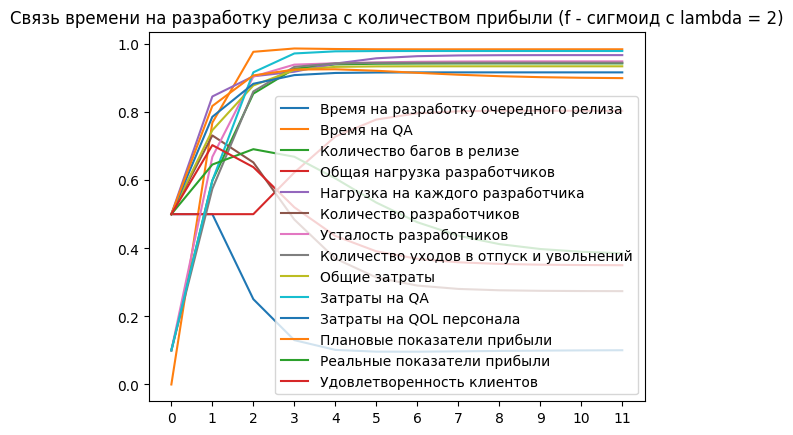

In [102]:
FCM1 = FuzzyCognitiveMap(get_sigmoid(2), "Связь времени на разработку релиза с количеством прибыли (f - сигмоид с lambda = 2)")

for n in N:
    FCM1.add_n(Node(n[0], start_value = n[1]))

for v in V:
    FCM1.add_v(*v)

for t in range(100):
    print(FCM1)
    if FCM1.should_continue == False:
        break
    FCM1.step()

FCM1.display()

НКК Связь времени на разработку релиза с количеством прибыли (f = sign(x)) | t = 0:
    Время на разработку очередного релиза = 0.5
    Время на QA = 0.0
    Количество багов в релизе = 0.1
    Общая нагрузка разработчиков = 0.5
    Нагрузка на каждого разработчика = 0.5
    Количество разработчиков = 0.5
    Усталость разработчиков = 0.1
    Количество уходов в отпуск и увольнений = 0.1
    Общие затраты = 0.5
    Затраты на QA = 0.1
    Затраты на QOL персонала = 0.5
    Плановые показатели прибыли = 0.5
    Реальные показатели прибыли = 0.5
    Удовлетворенность клиентов = 0.5

НКК Связь времени на разработку релиза с количеством прибыли (f = sign(x)) | t = 1:
    Время на разработку очередного релиза = 0
    Время на QA = 1
    Количество багов в релизе = 1
    Общая нагрузка разработчиков = 0
    Нагрузка на каждого разработчика = 1
    Количество разработчиков = 1
    Усталость разработчиков = 1
    Количество уходов в отпуск и увольнений = 1
    Общие затраты = 1
    Затраты на 

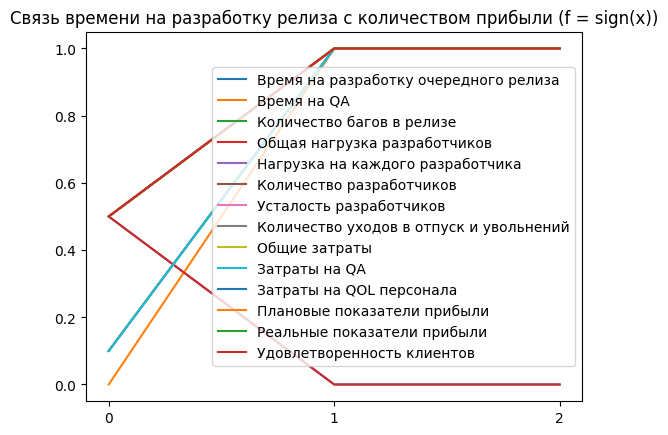

In [103]:
def get_linear(a1, a2):
    return lambda x: 0 if x < a1 else (1 if x > a2 else (x - a1)/(a2 - a1))

FCM2 = FuzzyCognitiveMap(lambda x: 1 if x > 0 else 0, "Связь времени на разработку релиза с количеством прибыли (f = sign(x))")

for n in N:
    FCM2.add_n(Node(n[0], start_value = n[1]))

for v in V:
    FCM2.add_v(*v)

for t in range(100):
    print(FCM2)
    if FCM2.should_continue == False:
        break
    FCM2.step()

FCM2.display()

НКК Связь времени на разработку релиза с количеством прибыли (f - КЗ линейная (между 0 и 1)) | t = 0:
    Время на разработку очередного релиза = 0.5
    Время на QA = 0.0
    Количество багов в релизе = 0.1
    Общая нагрузка разработчиков = 0.5
    Нагрузка на каждого разработчика = 0.5
    Количество разработчиков = 0.5
    Усталость разработчиков = 0.1
    Количество уходов в отпуск и увольнений = 0.1
    Общие затраты = 0.5
    Затраты на QA = 0.1
    Затраты на QOL персонала = 0.5
    Плановые показатели прибыли = 0.5
    Реальные показатели прибыли = 0.5
    Удовлетворенность клиентов = 0.5

НКК Связь времени на разработку релиза с количеством прибыли (f - КЗ линейная (между 0 и 1)) | t = 1:
    Время на разработку очередного релиза = 0.0
    Время на QA = 0.6
    Количество багов в релизе = 0.2
    Общая нагрузка разработчиков = 0.0
    Нагрузка на каждого разработчика = 0.85
    Количество разработчиков = 0.5
    Усталость разработчиков = 0.35
    Количество уходов в отпуск и 

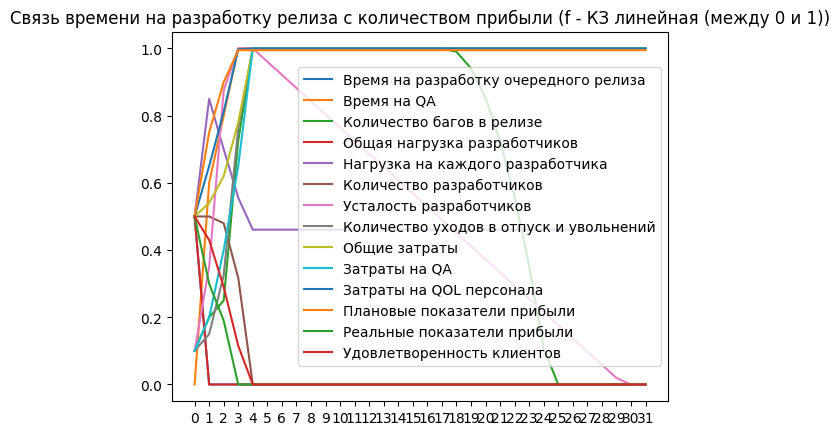

In [104]:
FCM3 = FuzzyCognitiveMap(get_linear(0, 1), "Связь времени на разработку релиза с количеством прибыли (f - КЗ линейная (между 0 и 1))")

for n in N:
    FCM3.add_n(Node(n[0], start_value = n[1]))

for v in V:
    FCM3.add_v(*v)

for t in range(100):
    print(FCM3)
    if FCM3.should_continue == False:
        break
    FCM3.step()

FCM3.display()

In [49]:
enum_values = {"None": 0, "Very Low": 1, "Low": 2, "Medium": 3, "High": 4, "Very High": 5}
value2enum = ["None", "Very Low", "Low", "Medium", "High", "Very High"]

N2 = [
    "Время на разработку очередного релиза", "Время на QA",
    "Количество багов в релизе", "Общая нагрузка разработчиков",
    "Нагрузка на каждого разработчика", "Количество разработчиков",
    "Усталость разработчиков", "Количество уходов в отпуск и увольнений", 
    "Общие затраты", "Затраты на QA", "Затраты на QOL персонала",
    "Плановые показатели прибыли", "Реальные показатели прибыли",
    "Удовлетворенность клиентов"
]

V2 = [
    ("Время на разработку очередного релиза", "Общая нагрузка разработчиков", -1, "High"),
    ("Время на разработку очередного релиза", "Время на QA", +1, "Low"),
    ("Общая нагрузка разработчиков", "Нагрузка на каждого разработчика", +1, "Very High"),
    ("Количество разработчиков", "Нагрузка на каждого разработчика", -1, "Medium"),
    ("Нагрузка на каждого разработчика", "Усталость разработчиков", +1, "Very High"),
    ("Усталость разработчиков", "Количество уходов в отпуск и увольнений", +1, "Medium"),
    ("Усталость разработчиков", "Количество багов в релизе", +1, "Very High"),
    ("Время на QA", "Количество багов в релизе", -1, "High"),
    ("Время на QA", "Время на разработку очередного релиза", -1, "Low"),
    ("Количество уходов в отпуск и увольнений", "Количество разработчиков", -1, "Medium"),
    ("Количество багов в релизе", "Затраты на QA", +1, "High"),
    ("Количество багов в релизе", "Удовлетворенность клиентов", -1, "High"),
    ("Удовлетворенность клиентов", "Реальные показатели прибыли", +1, "Very High"),
    ("Реальные показатели прибыли", "Плановые показатели прибыли", +1, "High"),
    ("Время на разработку очередного релиза", "Реальные показатели прибыли", -1, "Medium"),
    ("Затраты на QA", "Общие затраты", +1, "Low"),
    ("Затраты на QA", "Время на QA", +1, "High"),
    ("Общие затраты", "Затраты на QOL персонала", +1, "Very Low"),
    ("Общие затраты", "Реальные показатели прибыли", -1, "High"),
    ("Затраты на QOL персонала", "Количество разработчиков", +1, "Very Low"),
    ("Затраты на QOL персонала", "Усталость разработчиков", -1, "Medium"),
    ("Плановые показатели прибыли", "Время на разработку очередного релиза", -1, "High")
]

class BKFuzzyCognitiveMapNode:
    def __init__(self, name):
        self.name = name
    

class BKFuzzyCM:
    def __init__(self, name, nodes):
        self.name = name
        self.nodes = {node:i for i, node in enumerate(nodes)}
        self.v = [[] for i in range(len(nodes))]
    
    def add_v(self, name1, name2, sign, value):
        self.v[self.nodes[name1]].append([name2, sign, value])

    def calculate_bfs(self, current_node, to_node, current_pos_min = None, current_neg_min = None, nodes = set()):
        # print(f'Entered {current_node}, ans = ({current_pos_min}, {current_neg_min}), {nodes}')
        current_answer = [None, None]
        if current_node == to_node:
            # print(f'Got to {current_node}, ans = ({current_pos_min}, {current_neg_min}), {nodes}')
            return (current_pos_min, current_neg_min)
        nodes1 = nodes.copy()
        nodes1.add(current_node)
        for i in self.v[self.nodes[current_node]]:
            # print(f"Considering edge {i}")
            if i[2] != "None" and i[0] not in nodes:
                if i[1] == 1:
                    if current_pos_min != None:
                        ans = self.calculate_bfs(i[0], to_node, 
                                             min(current_pos_min, enum_values[i[2]]),
                                             current_neg_min, 
                                             nodes1)
                    else:
                        ans = self.calculate_bfs(i[0], to_node, 
                                                enum_values[i[2]],
                                                current_neg_min, 
                                                nodes1)
                else:
                    if current_pos_min != None:
                        ans = self.calculate_bfs(i[0], to_node, 
                                                current_neg_min, 
                                                min(current_pos_min, enum_values[i[2]]),
                                                nodes1)
                    else:
                        ans = self.calculate_bfs(i[0], to_node, 
                                                current_neg_min,
                                                enum_values[i[2]], 
                                                nodes1)
                if (ans != (None, None)):
                    if current_answer[0] != None and ans[0] != None:
                        current_answer[0] = max(current_answer[0], ans[0])
                    elif current_answer[0] == None:
                        current_answer[0] = ans[0]

                    if current_answer[1] != None and ans[1] != None:
                        current_answer[1] = max(current_answer[1], ans[1])
                    elif current_answer[1] == None:
                        current_answer[1] = ans[1]
                # print(f"Returned to {current_node}, new ans = ({current_answer})")

        return current_answer
        
    def calculate(self, node1, node2):
        a = [i if i != None else 0 for i in self.calculate_bfs(node1, node2)]
        print(f'Оценка влияния фактора "{node1}" на фактор "{node2}":\n    Положительного: {value2enum[a[0]]}\n    Отрицательного: {value2enum[a[1]]}')
        print(f'Общий эффект: {"Положительный" if a[0] > a[1] else ("Отрицательный" if a[0] < a[1] else "Неопределенный")}')
        return 


BK_FCM = BKFuzzyCM("name", N2) 

for v in V2:
    BK_FCM.add_v(*v)

BK_FCM.calculate("Время на разработку очередного релиза", "Общая нагрузка разработчиков")
print()
BK_FCM.calculate("Время на разработку очередного релиза", "Реальные показатели прибыли")



Оценка влияния фактора "Время на разработку очередного релиза" на фактор "Общая нагрузка разработчиков":
    Положительного: None
    Отрицательного: High
Общий эффект: Отрицательный

Оценка влияния фактора "Время на разработку очередного релиза" на фактор "Реальные показатели прибыли":
    Положительного: High
    Отрицательного: High
Общий эффект: Неопределенный


# 2


In [55]:
class Interval:
    def __init__(self, low, high):
        self.low = low
        self.high = high
    
    def __add__(self, other):
        if isinstance(other, Interval):
            return Interval(self.low + other.low, self.high + other.high)
        if isinstance(other, (float, int, np.float64)):
            return Interval(self.low + other, self.high + other)
        raise TypeError("Addition to the Interval must be integer, float or Interval")
    
    def defuzzify(self):
        return (self.low + self.high) / 2
    
    def __str__(self):
        return f"[{round(self.low, 2)}, {round(self.high, 2)}]"
    
    def __mul__(self, other):
        if isinstance(other, Interval):
            return Interval(
                min(self.low * other.low, self.low * other.high, self.high * other.low, self.high * other.high),
                max(self.low * other.low, self.low * other.high, self.high * other.low, self.high * other.high)
            )
        if isinstance(other, (float, int, np.float64)):
            return self*Interval(other, other)
        else:
            raise TypeError("Multiplier of the Interval must be integer, float or Interval")
    
    def __pow__(self, fl):
        if isinstance(fl, (float, int, np.float64)):
            return Interval(self[0]**fl, self[1]**fl)
        else:
            raise TypeError("Power of the Interval must be integer or float")

    def __gt__(self, other):
        return self.defuzzify() > other.defuzzify()
    
    def __truediv__(self, other):
        if isinstance(other, (float, int, np.float64)):
            if other != 0:
                return self*Interval(1/other, 1/other)
            else:
                return self
        else:
            raise TypeError("Divisor of the Interval must be integer, float or Interval")
    
    def __getitem__(self, index):
        if index == 0:
            return self.low
        elif index == 1:
            return self.high
        else:
            raise IndexError("Interval only has two elements: 0 (low) and 1 (high).")
    
    def num_in(self, num):
        return (num >= self[0] and num <= self[1])
    

In [56]:
def get_triangle(a, b, peak):
    return lambda x: 0 if x <= a or x >= b else (x - a) / (peak - a) if x <= peak else (b - x) / (b - peak)

def get_even_distr(x_min, x_max):
    f = lambda x: min(abs(x - x_min), abs(x - x_max))/((x_max - x_min)/2) if x_min <= x <= x_max else 0.0
    return lambda x: Interval(max(f(x) - 0.1, 0), min(f(x) + 0.1, 1))

def triangle_distr(x_min_top, x_max_top, peak = None, x_min_bot = None, x_max_bot = None):
    if peak is None:
        peak = (x_min_top + x_max_top)/2
    if x_min_bot is None:
        x_min_bot = 0.8*x_min_top + 0.2*x_max_top
    if x_max_bot is None:
        x_max_bot = 0.8*x_max_top + 0.2*x_min_top

    f1 = get_triangle(x_min_top, x_max_top, peak)
    f2 = get_triangle(x_min_bot, x_max_bot, peak)

    return lambda x: Interval(f2(x), f1(x))

In [57]:
class FuzzySet:
    def __init__(self, name, x_min, x_max, f = None, color = 'blue'):
        if f is None:
            f = triangle_distr(x_min, x_max)
        self.name = name
        self.f = f
        self.x_min = x_min
        self.color = color
        self.x_max = x_max
        if isinstance(f(x_min), Interval):
            self.is_IT2 = True
        else:
            self.is_IT2 = False

    def copy(self):
        a = self.f
        return FuzzySet(self.name, self.x_min, self.x_max, a, self.color)

    def __getitem__(self, x):
        return self.f(x)

    def __call__(self, x):
        return self.f(x)
    
    def __and__(self, other):
        return FuzzySet(f"({self.name} AND {other.name})", max(self.x_min, other.x_min), min(self.x_max, other.x_max),
                        lambda x: min(self.f(x), other.f(x)))

    def __or__(self, other):
        return FuzzySet(f"({self.name} OR {other.name})", min(self.x_min, other.x_min), max(self.x_max, other.x_max),
                        lambda x: max(self.f(x), other.f(x)))
    
    def __add__(self, other):
        if isinstance(other, (float, int, np.float64)):
            return FuzzySet(f"({self.name} + {round(other, 2)})", 
                            self.x_min + other, self.x_max + other,
                            lambda x: self.f(x - other))
        a = self
        b = other
        best = 0.0
        if a.is_IT2 or b.is_IT2:
            a = a._convert_to_IT2()
            b = b._convert_to_IT2()
            best = Interval(0.0, 0.0)

        fA, a_min, a_max = (a.f, a.x_min, a.x_max)
        fB, b_min, b_max = (b.f, b.x_min, b.x_max)
        xA = np.linspace(a_min, a_max, 1000)
        muA = np.array([fA(x) for x in xA])
        c_min = a_min + b_min
        c_max = a_max + b_max

        if not a.is_IT2:
            z_grid = np.linspace(c_min, c_max, 1000)
            muC = np.zeros_like(z_grid)
            for i, z in enumerate(z_grid):
                for x, mu_x in zip(xA, muA):
                    y = z - x
                    if b_min < y < b_max:
                        best = max(best, min(mu_x, fB(y)))
                muC[i] = best

            def fC(z):
                if z < c_min or z > c_max:
                    return 0.0
                return np.interp(z, z_grid, muC)
        
            return FuzzySet(f"({self.name} + {other.name})", c_min, c_max, fC)
        
        else:
            z_grid = np.linspace(c_min, c_max, 1000)
            muC_lower = np.zeros_like(z_grid)
            muC_upper = np.zeros_like(z_grid)

            for i, z in enumerate(z_grid):
                best_l = 0.0
                best_u = 0.0

                for x in xA:
                    mu_x = fA(x)        
                    y = z - x

                    if b_min <= y <= b_max:
                        mu_y = fB(y)    

                        cand_l = min(mu_x[0], mu_y[0])
                        cand_u = min(mu_x[1], mu_y[1])

                        best_l = max(best_l, cand_l)
                        best_u = max(best_u, cand_u)

                muC_lower[i] = best_l
                muC_upper[i] = best_u
            def fC(z):
                if z < c_min or z > c_max:
                    return Interval(0.0, 0.0)

                l = np.interp(z, z_grid, muC_lower)
                u = np.interp(z, z_grid, muC_upper)
                return Interval(l, u)
        return FuzzySet(f"({self.name} + {other.name})", c_min, c_max, fC)

    def __mul__(self, multiplier):
        if isinstance(multiplier, (float, int, np.float64)):
            return FuzzySet(f"({round(float(multiplier), 2)} * {self.name})",
                            min(self.x_min * multiplier, self.x_max * multiplier),
                            max(self.x_min * multiplier, self.x_max * multiplier),
                            lambda x: self(x/multiplier))
        
        if isinstance(multiplier, Interval):
            D = Interval(self.x_min, self.x_max)
            borders = D*multiplier
            x_final = np.linspace(borders[0], borders[1], 1000)
            y_final_l = np.ones(1000)
            y_final_h = np.zeros(1000)
            x = np.linspace(D[0], D[1], 1000)
            for x1 in x:
                for ind, x2 in enumerate(x_final):
                    if (multiplier*x1).num_in(x2):
                        y_final_h[ind] = max(y_final_h[ind], self(x1)[1])
                        y_final_l[ind] = min(y_final_l[ind], self(x1)[0])
                        
            def fm(z):
                if z < borders[0] or z > borders[1]:
                    return Interval(0.0, 0.0)
                l = np.interp(z, x_final, y_final_l)
                h = np.interp(z, x_final, y_final_h)
                if l > h: return Interval(0.0, 0.0)
                return Interval(l, h)
            
            return FuzzySet(f"({str(multiplier)} * {self.name})",
                            borders[0], borders[1],
                            fm)
        else:
            raise TypeError("Multiplier for a fuzzy set should be integer, float or Interval")

    def __sub__(self, other):
        return self + other*(-1)

    def normalize(self):
        if not self.is_IT2:    
            a = [self(x) for x in np.linspace(self.x_min, self.x_max, 1000)]
            f1 = self.f
            return FuzzySet(f"Normalized {self.name}", self.x_min, self.x_max, lambda x: f1(x) / max(a), self.color)
        else:
            a = [self(x)[1] for x in np.linspace(self.x_min, self.x_max, 1000)]
            f1 = self.f
            return FuzzySet(f"Normalized {self.name}", self.x_min, self.x_max, lambda x: f1(x) / max(a), self.color)
        


    def display(self, ax = None):
        if ax is None:
            fig, ax = plt.subplots()
            ax.set_xlim(self.x_min - 1, self.x_max + 1)

        x = np.linspace(self.x_min, self.x_max, 1000)
        y = [self(xi) for xi in x]
        if not self.is_IT2:
            ax.plot(x, y, label=self.name, color = self.color)
            ax.fill_between(x, y, color=self.color, alpha=0.2)
            # ax.set_ylim(0.0, max([self(x) for x in np.linspace(self.x_min, self.x_max, 10000)])*1.1)
        else:
            ax.plot(x, [y1[0] for y1 in y], label=self.name, color = self.color)
            ax.plot(x, [y1[1] for y1 in y], color = self.color)
            ax.fill_between(x, [y1[0] for y1 in y], [y1[1] for y1 in y], color=self.color, alpha=0.4)
            ax.fill_between(x, [y1[0] for y1 in y], color=self.color, alpha=0.1, label = None)
            # ax.set_ylim(0.0, max([self(x)[1] for x in np.linspace(self.x_min, self.x_max, 10000)])*1.1)

        ax.set_xlabel('x')
        ax.set_ylabel('Membership Degree')
        ax.legend()
        return ax

    def apply(self, modifier):
        name = str(modifier)
        if (modifier == 'not'):
            f1 = lambda x: Interval(1 - self(x)[1], 1 - self(x)[0])
        if (modifier == 'somewhat' or modifier == 'probably'):
            f1 = lambda x: (self(x)**(0.4))
        if (modifier == 'more or less'):
            f1 = lambda x: (self(x)**(0.5))
        if (modifier == 'definetely'):
            f1 = lambda x: (self(x)**(1.5))
        if (modifier == 'very'):
            f1 = lambda x: (self(x)**(2))
        return FuzzySet(f"{name.capitalize()} ({self.name})", self.x_min, self.x_max, f1) 

    def defuzzify(self, mode = 'COG'):
        x = np.linspace(self.x_min, self.x_max, 10000)
        if not self.is_IT2:  
            y = np.array([self(xi) for xi in x])
        else:
            y = np.array([self(xi).defuzzify() for xi in x])

        if mode == 'COG':
            num = np.sum(x * y)
            denom = np.sum(y)
            if denom == 0:
                if num != 0:
                    return None
                else:
                    return 0
            return round(num / denom, 2)
        else:
            norm = self.normalize()
            x = [xi for xi in np.linspace(self.x_min, self.x_max, 10000) if norm(xi) == 1]
            if mode == 'LoM':
                return min(x)
            if mode == 'RoM':
                return max(x)
            if mode == 'MoM':
                return np.median(x)

    def _convert_to_IT2(self):
        if self.is_IT2:
            return self
        return FuzzySet(self.name, self.x_min, self.x_max, lambda x: Interval(self(x), self(x)), self.color)

    def set_color(self, color):
        self.color = color
        return self
    
    def __eq__(self, other):
        return self.name == other.name and self.x_min == other.x_min and self.x_max == other.x_max and [self(xi) for xi in np.linspace(self.x_min, self.x_max, 1000)] == [other(xi) for xi in np.linspace(other.x_min, other.x_max, 1000)]

In [58]:
class LinguisticVariable:
    def __init__(self, name, values = []):
        self.name = name
        self.x_min = 0
        self.x_max = 0
        self.values = {v.name: v for v in values}
    
    def add_val(self, value):
        self.values[value.name] = value
        self.x_min = min(value.x_min, self.x_min)
        self.x_max = max(value.x_max, self.x_max) 

    def display(self):
        fig, ax = plt.subplots()
        for val_key in self.values.keys():
            self.values[val_key].display(ax)
        ax.set_title(f"'{self.name}' linguistic variable plot")
        return ax

<Axes: title={'center': "'Test' linguistic variable plot"}, xlabel='x', ylabel='Membership Degree'>

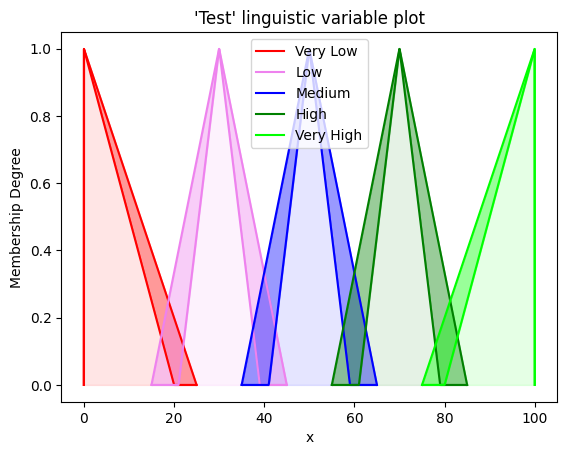

In [65]:
VLow = FuzzySet("Very Low", 0, 25, f = triangle_distr(0, 25, 0, 0), color='red')
Low = FuzzySet("Low", 15, 45, color='violet')
Medium = FuzzySet("Medium", 35, 65, color = 'blue')
High = FuzzySet('High', 55, 85, color = 'green')
VHigh = FuzzySet('Very High', 75, 100, f = triangle_distr(75, 100, 100, x_max_bot=100), color = 'lime')
test = LinguisticVariable("Test", [VLow, Low, Medium, High, VHigh])
test.display()


In [60]:
class LinguisticNode:
    def __init__(self, LV, start_value = None):
        if start_value == None:
            self.values = [LV.values[LV.values.keys()[0]]]
        else:
            self.values = [LV.values[start_value]]
        self.name = LV.name
        self.sum = self[-1].copy()
        self.LV = LV

    def apply(self, w):
        self.sum = self.sum + w
    
    def stage(self, clip = True):
        if not clip:
            self.values.append(self.sum.normalize())
        else:
            a = self.sum.f
            self.values.append(FuzzySet('Current Value', max(self.sum.x_min, 0), min(self.sum.x_max, 100), lambda x: a(x) if x >= 0 and x < 100 else Interval(0,0), color='black').normalize())
        self.sum = self.values[-1].copy()
        if self.values[-1] == self.values[-2]:
            return True
        else:
            return False
    
    def __getitem__(self, x):
        return self.values[x]
    
    def __str__(self):
        return f"{self.name} = {round(self.sum.defuzzify(), 2) if self.sum.defuzzify() is not None else 'Can`t defuzzify'}"
    
    def display(self):
        ax = self.LV.display()
        a = self.sum
        a.set_color('black')
        a.name = 'Current value'
        a.display(ax)


class LinguisticLink:
    def __init__(self, node_from, node_to, w = 1, modifier = None, time_delta = 1):
        self.w = w
        self.modifier = None
        self.node_from = node_from
        self.node_to = node_to
        self.time_delta = time_delta
        self.modifier = modifier
    
    def propagate(self, current_time): 
        if current_time < self.time_delta:
            return
        if self.modifier is not None:
            self.node_to.apply(((self.node_from[current_time - self.time_delta] - 50) * self.w).apply(self.modifier))
        else:
            self.node_to.apply(((self.node_from[current_time - self.time_delta] - 50) * self.w))

In [71]:
class CausalLoopDiagram:
    def __init__(self, name = ""):
        self.N = {}
        self.V = []
        self.v_map = dict()
        self.t = 0
        self.name = name
        self.should_continue = True

    def add_n(self, n):
        self.N[n.name] = n
    
    def add_v_tech(self, v):
        self.V.append(v)

    def add_v(self, n1_name, n2_name, w, modifier = None, time_delta = 1):
        n1 = self.N[n1_name]
        n2 = self.N[n2_name]
        v = LinguisticLink(n1, n2, w, modifier, time_delta)
        self.add_v_tech(v)
        self.v_map[(n1_name, n2_name)] = v
    
    def step_all(self):
        for v in self.V:
            v.propagate(self.t)
        self.should_continue = False
        for n in self.N.keys():
            self.should_continue |= self.N[n].stage()
        self.t += 1 
    
    def step_cycles(self, steps):
        for i in range(1, len(steps)):
            self.v_map[(steps[i-1], steps[i])].propagate(self.t)
            self.t += self.v_map[(steps[i-1], steps[i])].time_delta
            self.N[steps[i]].stage()

    def __str__(self):
        res = f"{self.name} | t = {self.t}:\n"
        for n in self.N.keys():
            res += f"    {str(self.N[n])}\n"
        return res
    
    def __getitem__(self, x):
        return self.N[x]

In [76]:
N = [("Производительность сотрудника", 'Medium'),
     ("Ожидания руководства", "Very Low"),
     ("Плановые показатели для сотрудника", "Low"),
     ("Дополнительный бонус (денежный)", "Very Low"),
     ("Усталость сотрудника", "Very Low"),
     ("Количество времени/сил, затраченного на работу", "Medium"),
     ("Количество времени/сил, остающихся на остальные дела", "High"),
     ("Затраты на сотрудника", "Low"),
     ("Желание уволиться", "Very Low")]


V = [
     ("Производительность сотрудника", "Ожидания руководства", (0.6, 0.8), 2),
     ("Ожидания руководства", "Плановые показатели для сотрудника", (0.8, 1), 1),
     ("Плановые показатели для сотрудника", "Дополнительный бонус (денежный)", (0.3, 0.7), 2),
     ("Дополнительный бонус (денежный)", "Производительность сотрудника", (0.4, 0.8), 3),
     ("Производительность сотрудника", "Количество времени/сил, затраченного на работу", (0.6, 0.8), 1),
     ("Количество времени/сил, затраченного на работу", "Количество времени/сил, остающихся на остальные дела", (-1, -1), 1),
     ("Количество времени/сил, остающихся на остальные дела", "Усталость сотрудника", (+0.9, +1), 3),
     ("Усталость сотрудника", "Производительность сотрудника", (-0.5, -0.7), 1),
     ("Дополнительный бонус (денежный)", "Затраты на сотрудника", (0.6, 0.8), 1),
     ("Затраты на сотрудника", "Плановые показатели для сотрудника", (0.5, 0.8), 1),
     ("Усталость сотрудника", "Желание уволиться", (0.2, 0.3), 1)
]

FCM 'Динамика производительности сотрудника' | t = 0:
    Производительность сотрудника = 50.0
    Ожидания руководства = 7.59
    Плановые показатели для сотрудника = 30.0
    Дополнительный бонус (денежный) = 7.59
    Усталость сотрудника = 7.59
    Количество времени/сил, затраченного на работу = 50.0
    Количество времени/сил, остающихся на остальные дела = 70.0
    Затраты на сотрудника = 30.0
    Желание уволиться = 7.59



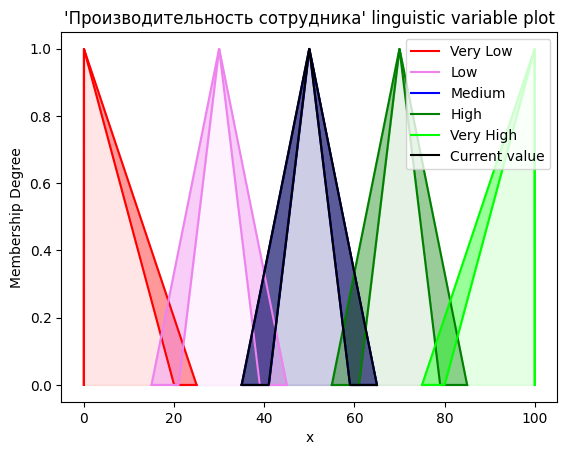

FCM 'Динамика производительности сотрудника' | t = 1:
    Производительность сотрудника = 50.0
    Ожидания руководства = 7.59
    Плановые показатели для сотрудника = 30.0
    Дополнительный бонус (денежный) = 7.59
    Усталость сотрудника = 7.59
    Количество времени/сил, затраченного на работу = 50.0
    Количество времени/сил, остающихся на остальные дела = 70.0
    Затраты на сотрудника = 30.0
    Желание уволиться = 7.59



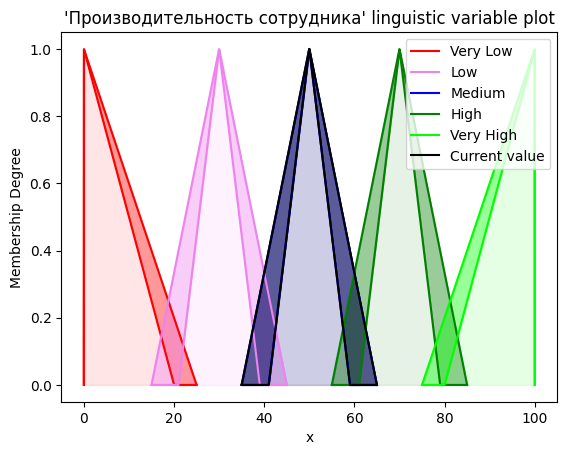

FCM 'Динамика производительности сотрудника' | t = 2:
    Производительность сотрудника = 71.21
    Ожидания руководства = 7.59
    Плановые показатели для сотрудника = 7.2
    Дополнительный бонус (денежный) = 7.59
    Усталость сотрудника = 7.59
    Количество времени/сил, затраченного на работу = 48.83
    Количество времени/сил, остающихся на остальные дела = 70.0
    Затраты на сотрудника = 8.74
    Желание уволиться = 5.9



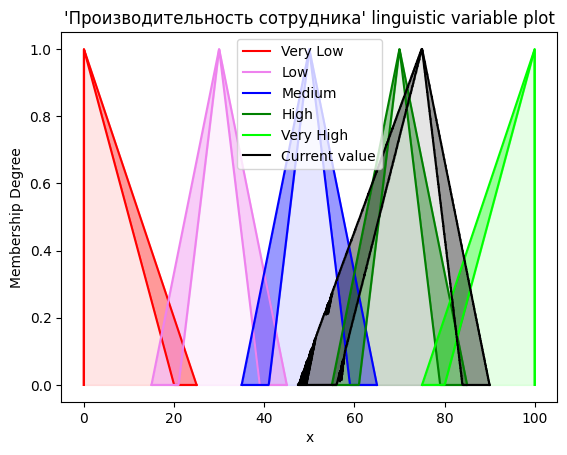

FCM 'Динамика производительности сотрудника' | t = 3:
    Производительность сотрудника = 88.26
    Ожидания руководства = 10.53
    Плановые показатели для сотрудника = 1.66
    Дополнительный бонус (денежный) = 6.9
    Усталость сотрудника = 7.59
    Количество времени/сил, затраченного на работу = 49.09
    Количество времени/сил, остающихся на остальные дела = 68.86
    Затраты на сотрудника = 4.72
    Желание уволиться = 4.39



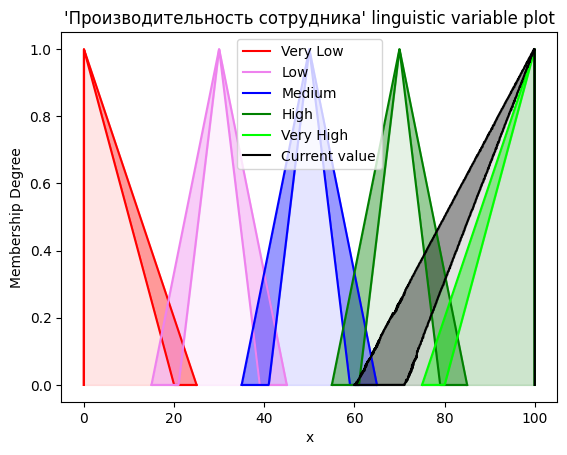

FCM 'Динамика производительности сотрудника' | t = 4:
    Производительность сотрудника = 86.17
    Ожидания руководства = 13.24
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 6.29
    Усталость сотрудника = 25.71
    Количество времени/сил, затраченного на работу = 62.25
    Количество времени/сил, остающихся на остальные дела = 64.9
    Затраты на сотрудника = 0
    Желание уволиться = 3.22



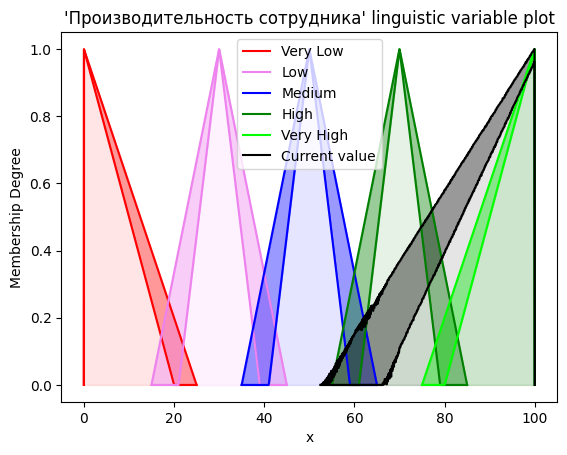

FCM 'Динамика производительности сотрудника' | t = 5:
    Производительность сотрудника = 83.99
    Ожидания руководства = 26.01
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 4.1
    Усталость сотрудника = 43.77
    Количество времени/сил, затраченного на работу = 76.53
    Количество времени/сил, остающихся на остальные дела = 59.93
    Затраты на сотрудника = 0
    Желание уволиться = 1.66



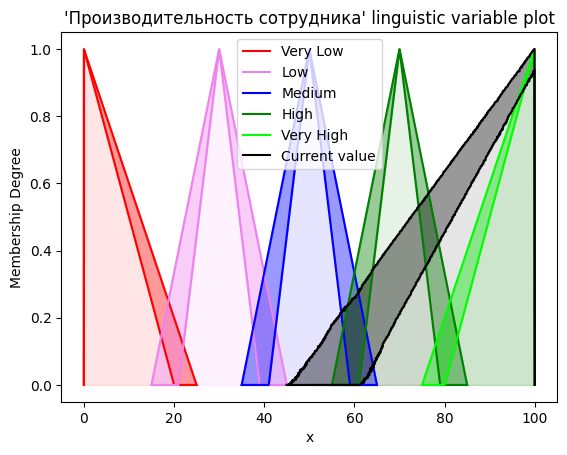

FCM 'Динамика производительности сотрудника' | t = 6:
    Производительность сотрудника = 77.31
    Ожидания руководства = 48.67
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 0.17
    Усталость сотрудника = 57.78
    Количество времени/сил, затраченного на работу = 77.48
    Количество времени/сил, остающихся на остальные дела = 52.34
    Затраты на сотрудника = 0
    Желание уволиться = 2.03



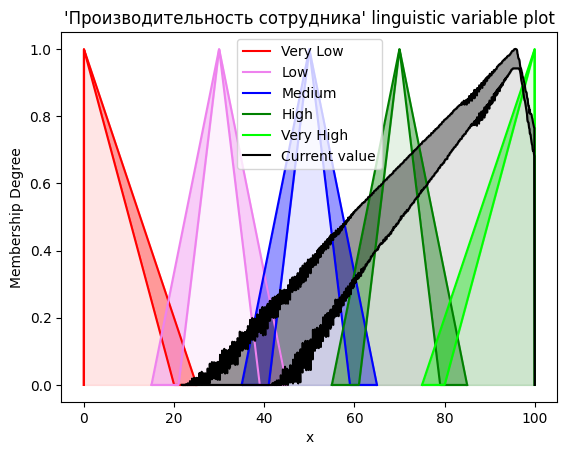

FCM 'Динамика производительности сотрудника' | t = 7:
    Производительность сотрудника = 61.4
    Ожидания руководства = 65.89
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 0
    Усталость сотрудника = 61.43
    Количество времени/сил, затраченного на работу = 77.2
    Количество времени/сил, остающихся на остальные дела = 41.82
    Затраты на сотрудника = 0
    Желание уволиться = 4.42



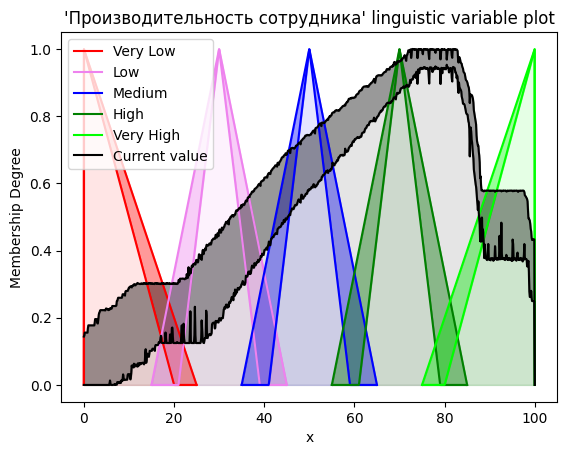

FCM 'Динамика производительности сотрудника' | t = 8:
    Производительность сотрудника = 47.39
    Ожидания руководства = 70.61
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 0
    Усталость сотрудника = 58.96
    Количество времени/сил, затраченного на работу = 73.56
    Количество времени/сил, остающихся на остальные дела = 41.75
    Затраты на сотрудника = 0
    Желание уволиться = 9.47



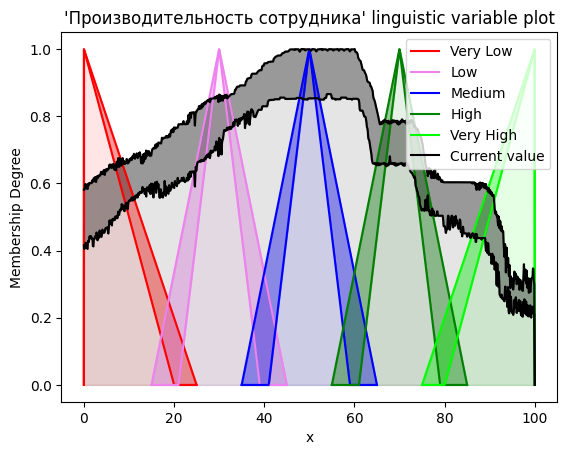

FCM 'Динамика производительности сотрудника' | t = 9:
    Производительность сотрудника = 42.73
    Ожидания руководства = 67.15
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 0
    Усталость сотрудника = 52.02
    Количество времени/сил, затраченного на работу = 60.0
    Количество времени/сил, остающихся на остальные дела = 41.51
    Затраты на сотрудника = 0
    Желание уволиться = 15.0



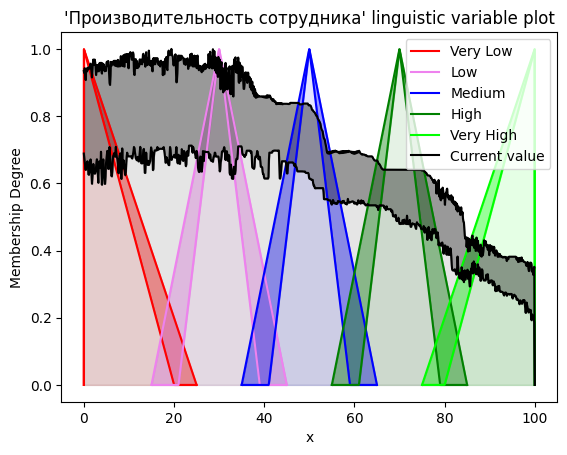

In [68]:
CLD = CausalLoopDiagram("FCM 'Динамика производительности сотрудника'")

for n in N:
     new_n = LinguisticNode(LinguisticVariable(n[0], [VLow, Low, Medium, High, VHigh]), n[1])
     CLD.add_n(new_n)
     
eta = 1
for v in V:
     CLD.add_v(v[0], v[1], Interval(v[2][0]*eta, v[2][0]*eta), time_delta=v[3])

cycle1 = ["Производительность сотрудника", "Количество времени/сил, затраченного на работу", "Количество времени/сил, остающихся на остальные дела", 
          "Усталость сотрудника"] * 2 + ["Производительность сотрудника"]

cycle2 = ["Производительность сотрудника", "Ожидания руководства", "Плановые показатели для сотрудника", "Дополнительный бонус (денежный)", "Затраты на сотрудника",
          "Плановые показатели для сотрудника", "Дополнительный бонус (денежный)", "Производительность сотрудника"]

for t in range(10):
     print(CLD)
     ax = CLD['Производительность сотрудника'].display()
     plt.show()
     CLD.step_all()

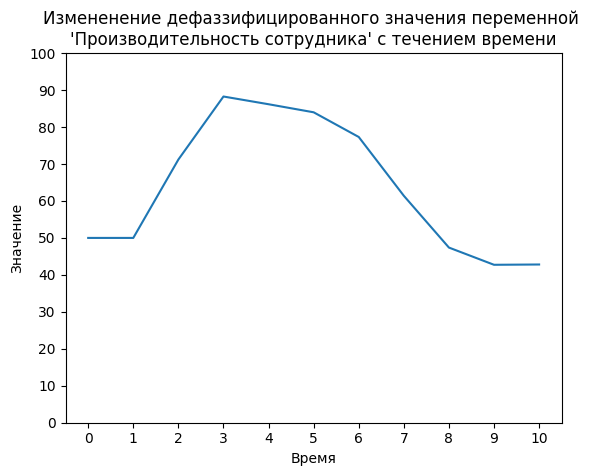

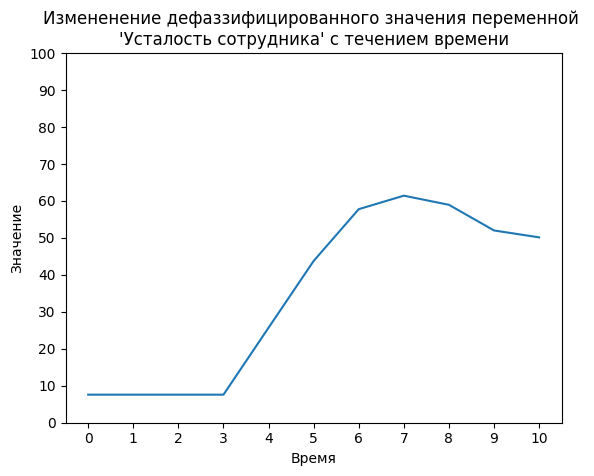

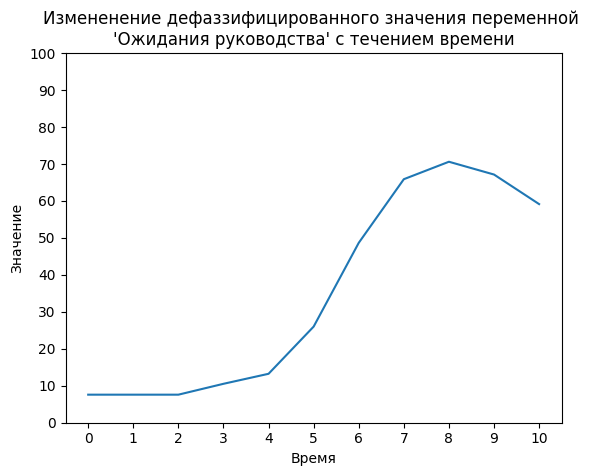

In [80]:
def BOT(var):
    fig, ax = plt.subplots()
    ax.plot([i for i in range(len(var.values))], [i.defuzzify() for i in var.values])
    ax.set_yticks([10*i for i in range(11)])
    ax.set_xticks([i for i in range(len(var.values))])
    ax.set_title(f"Измененение дефаззифицированного значения переменной \n'{var.name}' с течением времени")
    ax.set_xlabel("Время")
    ax.set_ylabel("Значение")

BOT(CLD['Производительность сотрудника'])
BOT(CLD['Усталость сотрудника'])
BOT(CLD['Ожидания руководства'])

CLD 'Связь дополнительного бонуса с производительностью сотрудника' | t = 0:
    Производительность сотрудника = 50.0
    Ожидания руководства = 7.59
    Плановые показатели для сотрудника = 30.0
    Дополнительный бонус (денежный) = 7.59
    Усталость сотрудника = 7.59
    Количество времени/сил, затраченного на работу = 50.0
    Количество времени/сил, остающихся на остальные дела = 70.0
    Затраты на сотрудника = 30.0
    Желание уволиться = 7.59



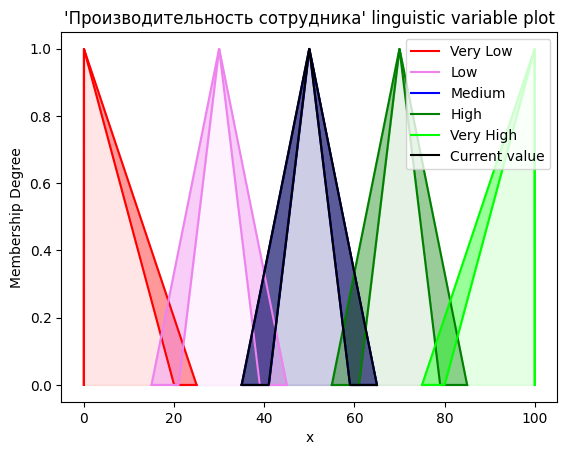

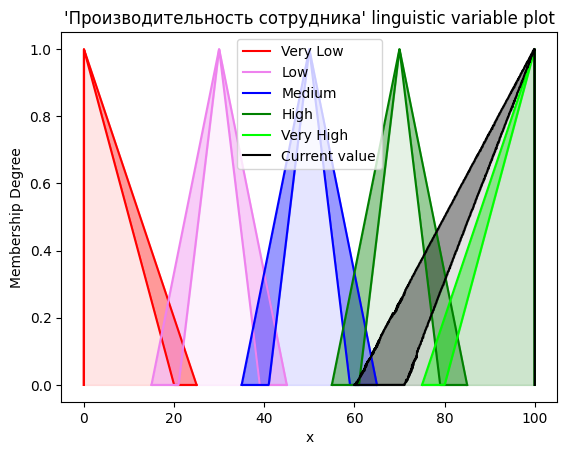

CLD 'Связь дополнительного бонуса с производительностью сотрудника' | t = 0:
    Производительность сотрудника = 71.21
    Ожидания руководства = 10.52
    Плановые показатели для сотрудника = 6.6
    Дополнительный бонус (денежный) = 6.29
    Усталость сотрудника = 43.77
    Количество времени/сил, затраченного на работу = 49.09
    Количество времени/сил, остающихся на остальные дела = 68.86
    Затраты на сотрудника = 8.74
    Желание уволиться = 5.9



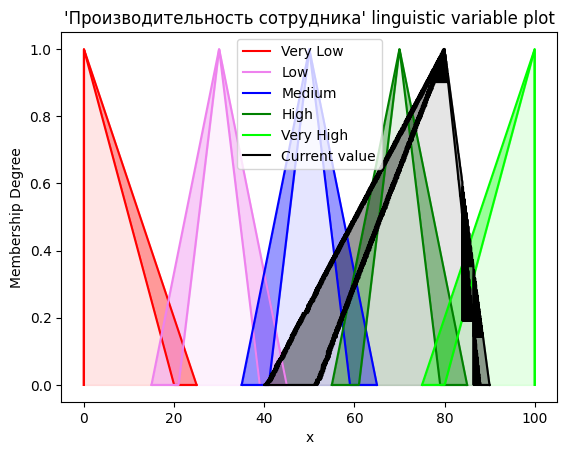

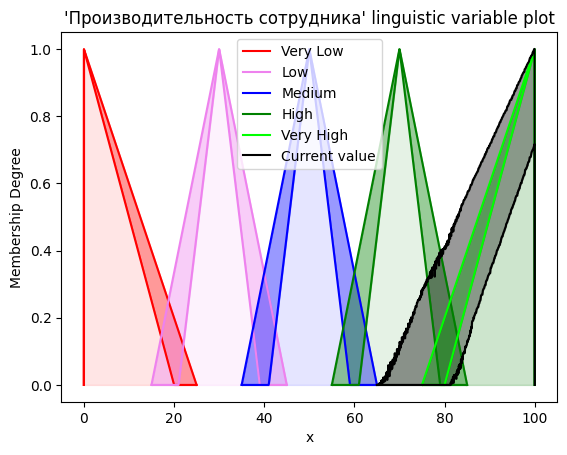

CLD 'Связь дополнительного бонуса с производительностью сотрудника' | t = 0:
    Производительность сотрудника = 73.53
    Ожидания руководства = 13.24
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 5.12
    Усталость сотрудника = 69.72
    Количество времени/сил, затраченного на работу = 49.29
    Количество времени/сил, остающихся на остальные дела = 64.09
    Затраты на сотрудника = 4.72
    Желание уволиться = 4.39



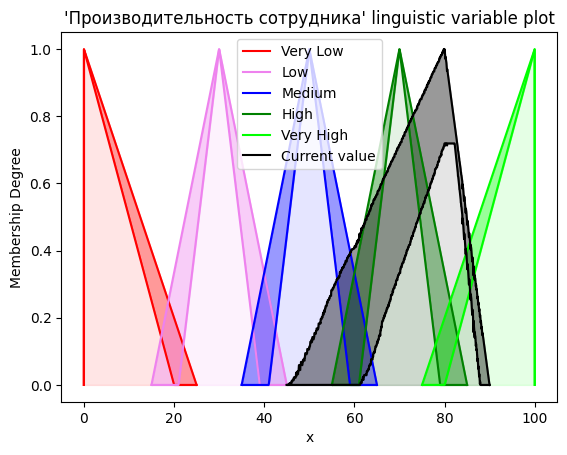

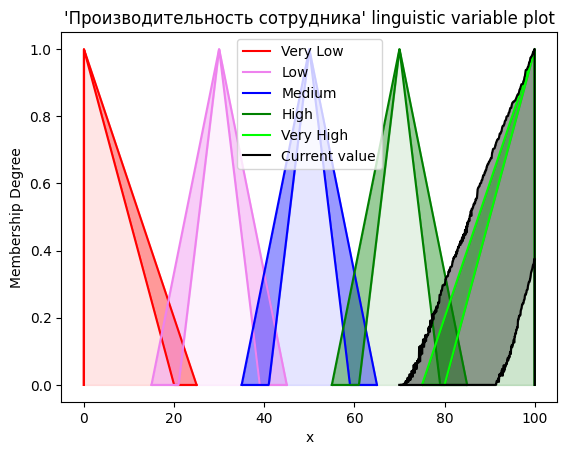

CLD 'Связь дополнительного бонуса с производительностью сотрудника' | t = 0:
    Производительность сотрудника = 75.01
    Ожидания руководства = 16.14
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 4.11
    Усталость сотрудника = 77.62
    Количество времени/сил, затраченного на работу = 49.07
    Количество времени/сил, остающихся на остальные дела = 60.03
    Затраты на сотрудника = 0
    Желание уволиться = 3.22



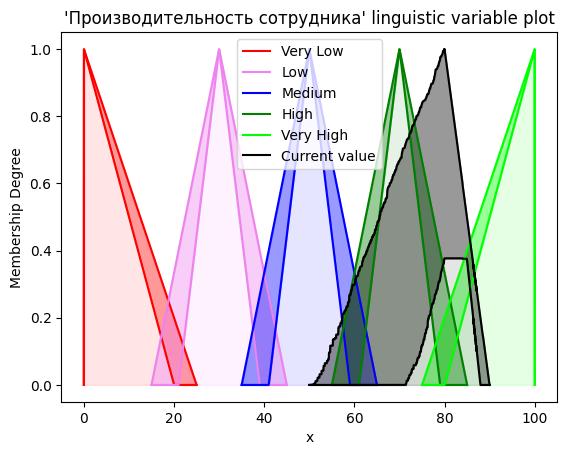

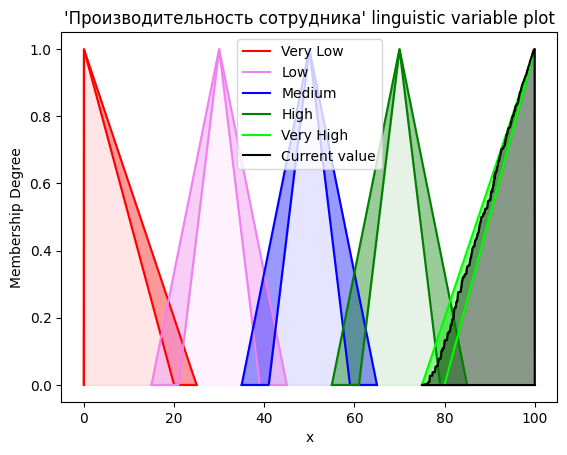

CLD 'Связь дополнительного бонуса с производительностью сотрудника' | t = 0:
    Производительность сотрудника = 75.65
    Ожидания руководства = 19.0
    Плановые показатели для сотрудника = 0
    Дополнительный бонус (денежный) = 3.15
    Усталость сотрудника = 80.25
    Количество времени/сил, затраченного на работу = 49.11
    Количество времени/сил, остающихся на остальные дела = 56.63
    Затраты на сотрудника = 0
    Желание уволиться = 1.66



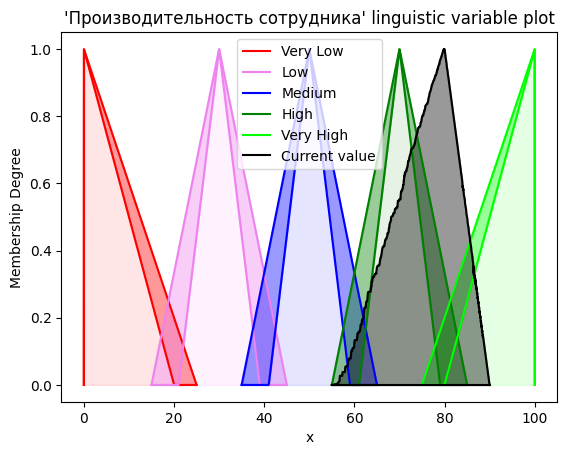

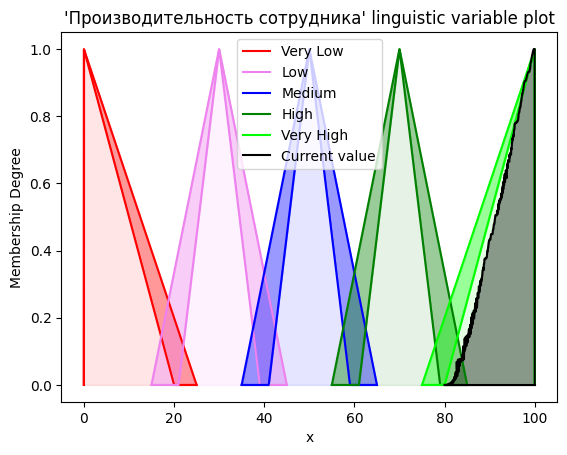

KeyboardInterrupt: 

In [78]:
CLD2 = CausalLoopDiagram("CLD 'Связь дополнительного бонуса с производительностью сотрудника'")
for n in N:
     new_n = LinguisticNode(LinguisticVariable(n[0], [VLow, Low, Medium, High, VHigh]), n[1])
     CLD2.add_n(new_n)
     
eta = 1
for v in V:
     CLD2.add_v(v[0], v[1], Interval(v[2][0]*eta, v[2][0]*eta), time_delta=0)

cycle1 = ["Производительность сотрудника", "Количество времени/сил, затраченного на работу", "Количество времени/сил, остающихся на остальные дела", 
          "Усталость сотрудника"] * 2 + ["Производительность сотрудника"]

cycle2 = ["Производительность сотрудника", "Ожидания руководства", "Плановые показатели для сотрудника", "Дополнительный бонус (денежный)", "Затраты на сотрудника",
          "Плановые показатели для сотрудника", "Дополнительный бонус (денежный)", "Производительность сотрудника"]

for t in range(5):
     print(CLD2)
     ax = CLD2['Производительность сотрудника'].display()
     plt.show()
     CLD2.step_cycles(cycle1)
     CLD2.step_cycles(["Усталость сотрудника", "Желание уволиться"])
     ax = CLD2['Производительность сотрудника'].display()
     plt.show()
     CLD2.step_cycles(cycle2)

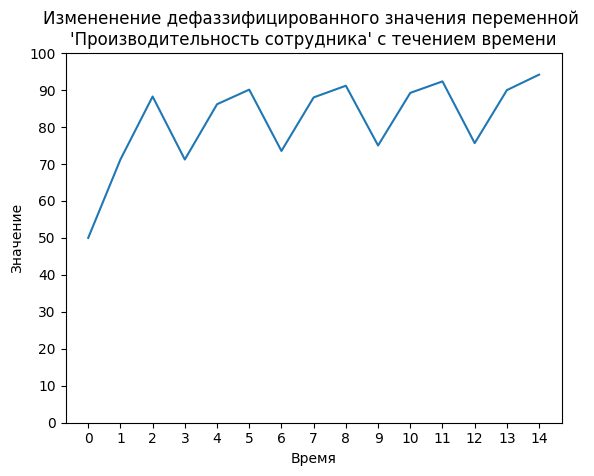

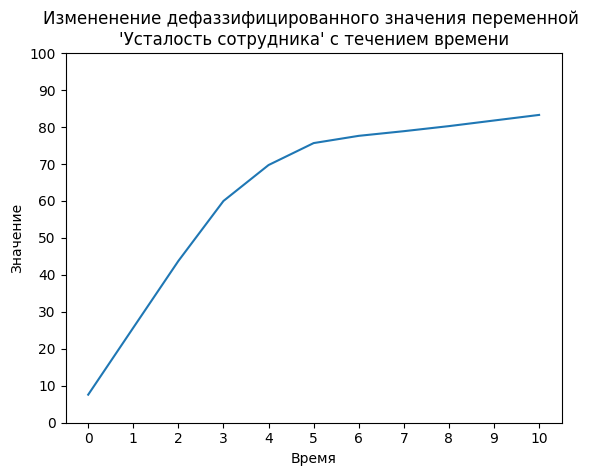

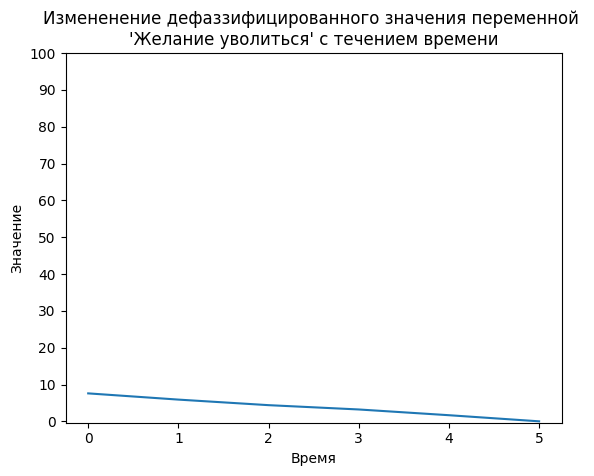

In [81]:
BOT(CLD2["Производительность сотрудника"])
BOT(CLD2["Усталость сотрудника"])
BOT(CLD2["Желание уволиться"])

# 3

In [ ]:
def YagerInterval(Cs, p):
    sum1 = 0
    sum2 = 0
    for c in Cs:
        sum1 += c[1]**p[0]
        sum2 += c[0]**p[1]
    return Interval((sum2/len(Cs))**(1/p[1]), (sum1/len(Cs))**(1/p[0]))


# C1	Flexibility
# C2	Ease to Learn
# C3	Speed of Programming
# C4	Performance
# C5	Safety

a1 = [[0.6, 0.80], [0.85, 0.95], [0.80, 0.95], [0.60, 0.70], [0.7, 0.7]] # Python
a2 = [[0.7, 0.95], [0.50, 0.60], [0.55, 0.70], [0.85, 0.95], [0.3, 0.5]] # C
a3 = [[0.7, 0.90], [0.60, 0.75], [0.65, 0.85], [0.85, 0.95], [0.5, 0.7]] # C++

p = [1, 5]
print(f"Интервал для a1 (Python): {YagerInterval(a1, p)}")
print(f"Интервал для a2 (C): {YagerInterval(a2, p)}")
print(f"Интервал для a3 (C++): {YagerInterval(a3, p)}")

Интервал для a1 (Python): [0.73, 0.8]
Интервал для a2 (C): [0.67, 0.74]
Интервал для a3 (C++): [0.7, 0.83]
